In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female

m_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_males_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df =  pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_females_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df = f_df.query('mouse!="F4_03"')

In [5]:
m_df.head(30)

0         2         4         5         6         7   \
age mouse                                                               
3.0 M1_01  0.000252  0.019522  0.001944  0.042958  0.004360  0.037461   
    M1_02  0.000492  0.022222  0.004109  0.026933  0.002329  0.013815   
    M1_03  0.000513  0.014366  0.002297  0.029892  0.001609  0.028816   
    M1_04  0.002505  0.019364  0.001450  0.038024  0.001010  0.021465   
    M2_01  0.000868  0.021715  0.001391  0.035369  0.000338  0.030754   
    M2_02  0.000489  0.029876  0.002174  0.023500  0.006801  0.008975   
    M2_03  0.000665  0.022905  0.002747  0.024280  0.001135  0.032514   
    M2_04  0.001426  0.021213  0.002038  0.016378  0.002354  0.012433   
    M3_01  0.001379  0.024605  0.002039  0.027299  0.001504  0.023588   
    M3_02  0.001500  0.020756  0.004281  0.029961  0.007859  0.019155   
    M3_03  0.000064  0.012085  0.002125  0.039021  0.001222  0.024932   
    M3_04  0.000185  0.034532  0.002199  0.024963  0.004887  0.024201   
    M4_01  0.000502  0.021306  0.004119  0.022690  0.004116  0.017453   
    M4_02  0.004261  0.023465  0.006932  0.025866  0.007397  0.009922   
    M4_03  0.002015  0.017497  0.000597  0.033370  0.001002  0.025649   
    M4_04  0.001612  0.018279  0.002004  0.026468  0.002647  0.015485   
    M5_01  0.000599  0.014323  0.003635  0.035470  0.002870  0.011063   
    M5_02  0.000658  0.027412  0.003754  0.028377  0.005171  0.018496   
    M5_03  0.002060  0.019941  0.004012  0.021063  0.000956  0.018226   
    M5_04  0.003340  0.019755  0.001347  0.030318  0.003143  0.017634   
4.0 M1_01  0.000178  0.059145  0.003619  0.018979  0.005035  0.034703   
    M1_02  0.000000  0.035774  0.001659  0.015594  0.009892  0.019589   
    M1_03  0.000189  0.052240  0.003426  0.019606  0.004769  0.029695   
    M1_04  0.002910  0.038518  0.009410  0.016052  0.004252  0.015695   
    M2_01  0.000941  0.049003  0.007629  0.022728  0.000965  0.028597   
    M2_02  0.000571  0.051257  0.003431  0.014938  0.008224  0.014005   
    M2_04  0.000860  0.033668  0.000627  0.019441  0.005284  0.019859   
    M3_02  0.000630  0.029648  0.002104  0.017681  0.011171  0.016192   
    M3_04  0.000000  0.053893  0.003987  0.023348  0.011718  0.014861   
    M4_02  0.000207  0.025994  0.002881  0.019117  0.010866  0.023054   

                 9         10        11        12  ...        77        79  \
age mouse                                          ...                       
3.0 M1_01  0.031587  0.000135  0.019116  0.004453  ...  0.000000  0.000573   
    M1_02  0.018502  0.000000  0.050046  0.000767  ...  0.000000  0.000246   
    M1_03  0.024281  0.001494  0.039755  0.008036  ...  0.000479  0.000554   
    M1_04  0.027432  0.001808  0.042038  0.009161  ...  0.000750  0.000371   
    M2_01  0.022142  0.001444  0.039438  0.006061  ...  0.000233  0.000448   
    M2_02  0.035446  0.000734  0.068161  0.006569  ...  0.000241  0.000726   
    M2_03  0.032488  0.001714  0.029799  0.004445  ...  0.000563  0.000471   
    M2_04  0.015376  0.002538  0.049093  0.014283  ...  0.000000  0.000574   
    M3_01  0.030506  0.004335  0.024724  0.009756  ...  0.000204  0.000512   
    M3_02  0.023985  0.001305  0.033740  0.001766  ...  0.000266  0.001547   
    M3_03  0.028546  0.000359  0.035678  0.005530  ...  0.000000  0.000217   
    M3_04  0.026338  0.001195  0.049711  0.003851  ...  0.000094  0.000648   
    M4_01  0.032331  0.000909  0.027721  0.004528  ...  0.000000  0.000707   
    M4_02  0.027164  0.002327  0.041469  0.006099  ...  0.000000  0.001298   
    M4_03  0.034858  0.001933  0.035467  0.005864  ...  0.000111  0.000888   
    M4_04  0.027008  0.002291  0.046916  0.012223  ...  0.001034  0.000401   
    M5_01  0.026245  0.000951  0.031087  0.003141  ...  0.000156  0.001036   
    M5_02  0.023778  0.000983  0.048866  0.001143  ...  0.000228  0.005421   
    M5_03  0.028844  0.003042  0.053588  0.008708  ...  0.000683  0.001123   
    M5_04  0.023711  0.003698  0.037313  0

## heatmaps

In [6]:
# avarage per age or session
avg_m_df = m_df.groupby(['age']).mean()
avg_f_df = f_df.groupby(['age']).mean()

# normalize the data
m_norm = mm_norm_col(m_df)
avg_m_norm = mm_norm_col(avg_m_df)

# normalize the data
f_norm = mm_norm_col(f_df)
avg_f_norm = mm_norm_col(avg_f_df)


In [7]:
format_plots()

In [8]:
## male heatmap average

In [9]:
# get distance
data=avg_m_norm # un-normalized
dist_matrix = squareform(pdist(data,metric='cosine'))
data_labels=data.index.get_level_values('age').to_numpy()

percentiles_up = [95]
percentiles_down = [5]
#vmax_value = np.percentile(dist_matrix, percentiles_up)
#vmin_value = np.percentile(dist_matrix, percentiles_down)

vmax_value = 0.57430365
vmin_value = 0.02377485

In [10]:
print(vmax_value)
print(vmin_value)

0.57430365
0.02377485


In [11]:
#colors for plotting
cmap2 = cmm
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='magma_r'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

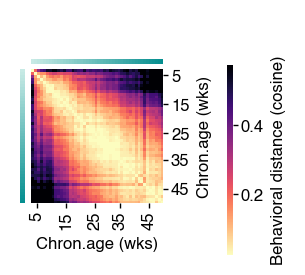

In [12]:
# plot syllable usage acoss time points
cg=sns.clustermap(
    data=dist_matrix,
    cmap=seqmatcolor, 
    figsize=(1.3, 1.3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=ages,
    xticklabels=ages,
    cbar_kws={'label': 'Behavioral distance (cosine)'}, 
    vmin=vmin_value,
    vmax=vmax_value,
    rasterized=True,
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
#ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Chron.age (wks)')
ax.set_ylabel('Chron.age (wks)')

# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)
# legend
#for i,c in enumerate(colors):
#        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
#plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [13]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig4"/ '07_31_male_dist_matrix_minmax_cosine_longv2_beh_age.pdf')

In [14]:
## female

In [15]:
# get distance
data=avg_f_norm # un-normalized
dist_matrix = squareform(pdist(data,metric='cosine'))
data_labels=data.index.get_level_values('age').to_numpy()

percentiles_up = [95]
percentiles_down = [5]
#vmax_value = np.percentile(dist_matrix, percentiles_up)
#vmin_value = np.percentile(dist_matrix, percentiles_down)

In [16]:
#colors for plotting
cmap2 = cmf
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='magma_r'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

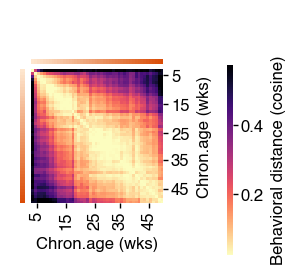

In [17]:
# plot syllable usage acoss time points
cg=sns.clustermap(
    data=dist_matrix,
    #data=squareform(pdist(data,metric='cosine')),
    cmap=seqmatcolor, 
    figsize=(1.3, 1.3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=ages,
    xticklabels=ages,
    cbar_kws={'label': 'Behavioral distance (cosine)'}, 
    vmin=vmin_value,
    vmax=vmax_value,
    rasterized=True,
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
#ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Chron.age (wks)')
ax.set_ylabel('Chron.age (wks)')

# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)

# legend
#for i,c in enumerate(colors):
#        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
#plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [18]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig4"/ '07_31_female_dist_matrix_minmax_cosine_longv2_beh_age.pdf')